In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Bernt's code starts here

In [3]:
# Importing necessary dataframes

birthrate_csv = "../project-one/Resources/children_per_woman_total_fertility.csv"
birthrate_df = pd.read_csv(birthrate_csv)
birthrate_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


In [4]:
co2_csv = "../project-one/Resources/co2_emissions_tonnes_per_person.csv"
co2_df = pd.read_csv(co2_csv)
co2_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [5]:
income_csv = "../project-one/Resources/income_per_person_gdppercapita_ppp_inflation_adjusted.csv"
income_df = pd.read_csv(income_csv)
income_df.head()
# units are in dollars, I believe

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [6]:
population_csv = "../project-one/Resources/population_total.csv"
population_df = pd.read_csv(population_csv)
population_df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,71900000,71800000,71600000,71500000,71300000,71200000,71000000,70800000,70600000,70400000
1,Albania,410000,412000,413000,414000,416000,417000,418000,420000,421000,...,1820000,1800000,1780000,1760000,1740000,1720000,1710000,1690000,1670000,1660000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2570000,2580000,...,62800000,62800000,62800000,62800000,62800000,62800000,62700000,62700000,62600000,62600000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,64300,64200,64100,63900,63800,63700,63500,63400,63300,63100
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,156000000,158000000,160000000,162000000,164000000,166000000,167000000,169000000,171000000,173000000


In [7]:
# For reference only:
# these are the years we are interested in:  [1804, 1834, 1864, 1894, 1824, 1954, 1984, and 2014]

In [8]:
# Step 2: Merge the data...BUT FIRST!! To prep for an inner join (where the only data merged is
# whatever matches in our reference columns), we can dropna() first, and then merge

# Removing "not a number's"

#birthrate_df = birthrate_df.dropna()
#co2_df = co2_df.dropna()

In [9]:
# Step 3: Clean the data (dropna, isolate the specific year columns we're interested in)

In [10]:
# Step 4: Plot our data with CO2 emissions on the x-axis, and birthrate on the y-axis
# BONUS: try formatting dot size by population or income level

In [11]:
# Bernt's code ends here

In [12]:
# Kaan's code starts here

In [13]:
# Kaan's code ends here

In [14]:
# Molly's code starts here

In [15]:
# Molly's code stops here

In [16]:
# Vallie's code starts here

#print out the birthrate df
birthrate_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,5.63,5.63,5.64,5.64,5.64,5.65,5.65,5.65,5.66,...,2.50,2.47,2.44,2.42,2.39,2.37,2.34,2.32,2.29,2.27
180,Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.94,1.95,1.95,1.96,1.96,1.96,1.96,1.95,1.95,1.95
181,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,4.80,4.67,4.55,4.44,4.33,4.22,4.10,4.00,3.89,3.79
182,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.48,5.40,5.32,5.24,5.17,5.10,5.04,4.98,4.93,4.87


In [17]:
#print out the co2 dataframe
co2_df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.920,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.1600,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030
188,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1600,1.2100,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9740,1.0100,0.9640,0.999,1.070,0.993,0.811,0.749,0.997,0.865
190,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.1900,0.1850,0.1520,0.166,0.186,0.194,0.206,0.249,0.261,0.288


In [18]:
#merge birthrate and co2 dataframes on country
co2_br_merge = pd.merge(co2_df, birthrate_df, on="country")
co2_br_merge

,country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.50,2.47,2.44,2.42,2.39,2.37,2.34,2.32,2.29,2.27
180,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.94,1.95,1.95,1.96,1.96,1.96,1.96,1.95,1.95,1.95
181,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.80,4.67,4.55,4.44,4.33,4.22,4.10,4.00,3.89,3.79
182,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.48,5.40,5.32,5.24,5.17,5.10,5.04,4.98,4.93,4.87


In [19]:
#rename columns
co2_br_rename = co2_br_merge.rename(columns={"country": "Country",
                                             "1974_x": "1974 CO2 Emissions",
                                             "1984_x": "1984 CO2 Emissions",
                                             "1994_x": "1994 CO2 Emissions",
                                             "2004_x": "2004 CO2 Emissions",
                                             "2014_x": "2014 CO2 Emissions",
                                             "1974_y": "Birthrate_1974",
                                             "1984_y": "Birthrate_1984",
                                             "1994_y": "Birthrate_1994",
                                             "2004_y": "Birthrate_2004",
                                             "2014_y": "Birthrate_2014"})
co2_br_rename

,Country,1800_x,1801_x,1802_x,1803_x,1804_x,1805_x,1806_x,1807_x,1808_x,...,2009_y,2010_y,2011_y,2012_y,2013_y,Birthrate_2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.50,2.47,2.44,2.42,2.39,2.37,2.34,2.32,2.29,2.27
180,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.94,1.95,1.95,1.96,1.96,1.96,1.96,1.95,1.95,1.95
181,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.80,4.67,4.55,4.44,4.33,4.22,4.10,4.00,3.89,3.79
182,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.48,5.40,5.32,5.24,5.17,5.10,5.04,4.98,4.93,4.87


In [20]:
#make df with only the columns we want to keep
co2_br_df = co2_br_rename[["Country", "1974 CO2 Emissions", "1984 CO2 Emissions", "1994 CO2 Emissions", "2004 CO2 Emissions", "2014 CO2 Emissions",
                           "Birthrate_1974", "Birthrate_1984", "Birthrate_1994", "Birthrate_2004", "Birthrate_2014"]]
co2_br_df

,Country,1974 CO2 Emissions,1984 CO2 Emissions,1994 CO2 Emissions,2004 CO2 Emissions,2014 CO2 Emissions,Birthrate_1974,Birthrate_1984,Birthrate_1994,Birthrate_2004,Birthrate_2014
0,Afghanistan,0.156,0.235,0.080,0.0394,0.299,7.45,7.46,7.57,6.99,4.98
1,Albania,1.840,2.700,0.613,1.3400,1.960,4.37,3.32,2.67,1.82,1.71
2,Algeria,1.960,3.250,3.050,2.7000,3.720,7.51,6.04,3.70,2.44,2.89
3,Angola,0.652,0.487,0.281,0.9960,1.290,7.61,7.39,6.99,6.50,5.84
4,Antigua and Barbuda,6.050,2.070,3.730,4.7800,5.380,2.91,2.10,2.17,2.25,2.08
...,...,...,...,...,...,...,...,...,...,...,...
179,Venezuela,5.780,5.460,5.980,5.7600,6.030,4.78,3.86,3.15,2.66,2.37
180,Vietnam,0.400,0.294,0.355,1.0800,1.800,6.13,4.36,2.90,1.89,1.96
181,Yemen,0.337,0.757,0.617,0.9430,0.865,8.12,8.86,7.80,5.60,4.22
182,Zambia,0.876,0.418,0.272,0.1830,0.288,7.38,6.81,6.23,5.86,5.10


In [21]:
#create 1974 dataframe, co2 descending order
df_1974 = co2_br_df[["Country", "1974 CO2 Emissions", "Birthrate_1974"]].sort_values("1974 CO2 Emissions", ascending=False).reset_index()
df_1974 = df_1974[["Country", "1974 CO2 Emissions", "Birthrate_1974"]]
df_1974

,Country,1974 CO2 Emissions,Birthrate_1974
0,Qatar,68.2,6.58
1,United Arab Emirates,66.5,6.25
2,Brunei,52.8,5.56
3,Luxembourg,41.0,1.63
4,Bahamas,39.9,3.33
...,...,...,...
179,Palestine,NaN,7.65
180,Serbia,NaN,2.36
181,Slovenia,NaN,2.20
182,South Sudan,NaN,6.93


In [22]:
#drop rows with nan values
df_1974 = df_1974.dropna()
df_1974

,Country,1974 CO2 Emissions,Birthrate_1974
0,Qatar,68.20000,6.58
1,United Arab Emirates,66.50000,6.25
2,Brunei,52.80000,5.56
3,Luxembourg,41.00000,1.63
4,Bahamas,39.90000,3.33
...,...,...,...
164,Maldives,0.02770,7.04
165,Burundi,0.02530,7.35
166,Rwanda,0.01740,8.34
167,Bhutan,0.01080,6.69


Text(0, 0.5, 'Birthrate (% ??)')

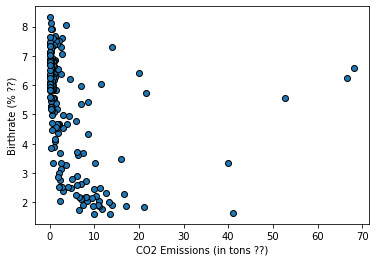

In [23]:
#run linear regression on co2 v birthrate (year 1974)

#first create scatter plot
x_values = df_1974["1974 CO2 Emissions"]
y_values = df_1974["Birthrate_1974"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (in tons ??)")
plt.ylabel("Birthrate (% ??)")

In [24]:
#perform a linear regression on co2 v birthrate (year 1974)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      1.591030
1      1.684783
2      2.440318
3      3.091071
4      3.151735
         ...   
164    5.350635
165    5.350768
166    5.351204
167    5.351567
168    5.351626
Name: 1974 CO2 Emissions, Length: 169, dtype: float64


In [25]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.06x +5.35


The r-squared is: -0.2799233935911636


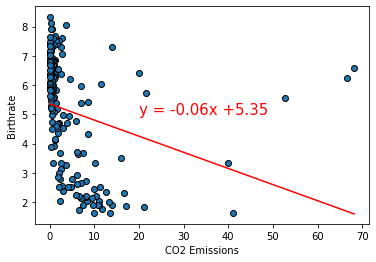

In [26]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
#plt.savefig(os.path.join("Images","1974_co2_v_birthrate.png"))

#show plot
plt.show()

In [27]:
#create 1984 dataframe, co2 descending order
df_1984 = co2_br_df[["Country", "1984 CO2 Emissions", "Birthrate_1984"]].sort_values("1984 CO2 Emissions", ascending=False).reset_index()
df_1984 = df_1984[["Country", "1984 CO2 Emissions", "Birthrate_1984"]]
df_1984

,Country,1984 CO2 Emissions,Birthrate_1984
0,Qatar,36.1,5.13
1,United Arab Emirates,35.2,5.22
2,Luxembourg,24.4,1.45
3,Bahrain,22.6,4.47
4,United States,18.8,1.79
...,...,...,...
179,Palestine,NaN,6.95
180,Serbia,NaN,2.31
181,Slovenia,NaN,1.85
182,South Sudan,NaN,6.81


In [28]:
#drop rows with nan values
df_1984 = df_1984.dropna()
df_1984

,Country,1984 CO2 Emissions,Birthrate_1984
0,Qatar,36.1000,5.13
1,United Arab Emirates,35.2000,5.22
2,Luxembourg,24.4000,1.45
3,Bahrain,22.6000,4.47
4,United States,18.8000,1.79
...,...,...,...
164,Burundi,0.0481,7.46
165,Chad,0.0437,7.09
166,Nepal,0.0431,5.55
167,Ethiopia,0.0421,7.44


Text(0, 0.5, 'Birthrate (% ??)')

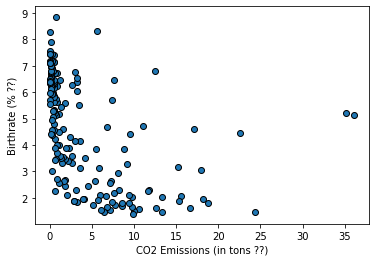

In [29]:
#run linear regression on co2 v birthrate (year 1984)

#first create scatter plot
x_values = df_1984["1984 CO2 Emissions"]
y_values = df_1984["Birthrate_1984"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (in tons ??)")
plt.ylabel("Birthrate (% ??)")

In [30]:
#perform a linear regression on co2 v birthrate (year 1984)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -0.339683
1     -0.202840
2      1.439279
3      1.712966
4      2.290749
         ...   
164    5.141940
165    5.142609
166    5.142700
167    5.142852
168    5.143004
Name: 1984 CO2 Emissions, Length: 169, dtype: float64


In [31]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.15x +5.15


The r-squared is: -0.46050704252171903


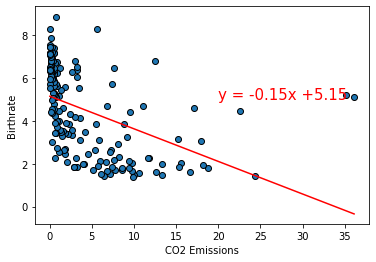

In [32]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
#plt.savefig(os.path.join("Images","1984_co2_v_birthrate.png"))

#show plot
plt.show()

In [33]:
#create 1994 dataframe, co2 descending order
df_1994 = co2_br_df[["Country", "1994 CO2 Emissions", "Birthrate_1994"]].sort_values("1994 CO2 Emissions", ascending=False).reset_index()
df_1994 = df_1994[["Country", "1994 CO2 Emissions", "Birthrate_1994"]]
df_1994

,Country,1994 CO2 Emissions,Birthrate_1994
0,Qatar,59.6000,3.65
1,United Arab Emirates,31.4000,3.62
2,Bahrain,26.9000,3.21
3,Luxembourg,25.3000,1.69
4,Kuwait,23.4000,2.66
...,...,...,...
179,Haiti,0.0392,5.00
180,Uganda,0.0355,7.04
181,Chad,0.0152,7.42
182,South Sudan,NaN,6.60


In [34]:
#drop rows with nan values
df_1994 = df_1994.dropna()
df_1994

,Country,1994 CO2 Emissions,Birthrate_1994
0,Qatar,59.6000,3.65
1,United Arab Emirates,31.4000,3.62
2,Bahrain,26.9000,3.21
3,Luxembourg,25.3000,1.69
4,Kuwait,23.4000,2.66
...,...,...,...
177,Ethiopia,0.0404,7.05
178,Burundi,0.0400,7.34
179,Haiti,0.0392,5.00
180,Uganda,0.0355,7.04


Text(0, 0.5, 'Birthrate (% ??)')

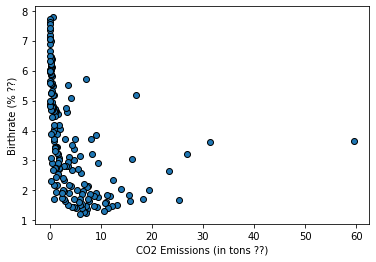

In [35]:
#run linear regression on co2 v birthrate (year 1994)

#first create scatter plot
x_values = df_1994["1994 CO2 Emissions"]
y_values = df_1994["Birthrate_1994"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (in tons ??)")
plt.ylabel("Birthrate (% ??)")

In [36]:
#perform a linear regression on co2 v birthrate (year 1994)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -2.348003
1      0.753391
2      1.248294
3      1.424260
4      1.633219
         ...   
177    4.202273
178    4.202317
179    4.202405
180    4.202812
181    4.205045
Name: 1994 CO2 Emissions, Length: 182, dtype: float64


In [37]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.11x +4.21


The r-squared is: -0.4071706551055931


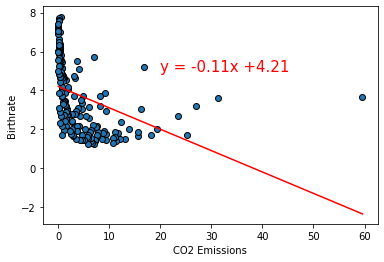

In [38]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel("CO2 Emissions")
plt.ylabel("Birthrate")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
#plt.savefig(os.path.join("Images","1994_co2_v_birthrate.png"))

#show plot
plt.show()

In [39]:
#create 2004 dataframe, co2 descending order
df_2004 = co2_br_df[["Country", "2004 CO2 Emissions", "Birthrate_2004"]].sort_values("2004 CO2 Emissions", ascending=False).reset_index()
df_2004 = df_2004[["Country", "2004 CO2 Emissions", "Birthrate_2004"]]
df_2004

,Country,2004 CO2 Emissions,Birthrate_2004
0,Qatar,56.6000,2.71
1,Kuwait,28.8000,2.55
2,United Arab Emirates,27.7000,2.24
3,Trinidad and Tobago,25.9000,1.76
4,Luxembourg,24.9000,1.65
...,...,...,...
179,Afghanistan,0.0394,6.99
180,Chad,0.0389,7.15
181,Burundi,0.0276,6.76
182,"Congo, Dem. Rep.",0.0226,6.76


In [40]:
#drop rows with nan values
df_2004 = df_2004.dropna()
df_2004

,Country,2004 CO2 Emissions,Birthrate_2004
0,Qatar,56.6000,2.71
1,Kuwait,28.8000,2.55
2,United Arab Emirates,27.7000,2.24
3,Trinidad and Tobago,25.9000,1.76
4,Luxembourg,24.9000,1.65
...,...,...,...
178,Central African Republic,0.0579,5.41
179,Afghanistan,0.0394,6.99
180,Chad,0.0389,7.15
181,Burundi,0.0276,6.76


Text(0, 0.5, 'Birthrate (% ??)')

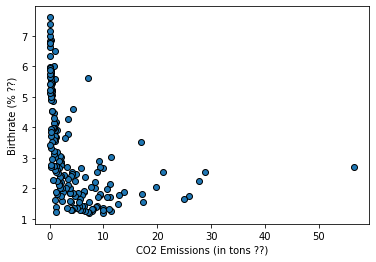

In [41]:
#run linear regression on co2 v birthrate (year 2004)

#first create scatter plot
x_values = df_2004["2004 CO2 Emissions"]
y_values = df_2004["Birthrate_2004"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (in tons ??)")
plt.ylabel("Birthrate (% ??)")

In [42]:
#perform a linear regression on co2 v birthrate (year 2004)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -2.334418
1      0.599603
2      0.715698
3      0.905670
4      1.011211
         ...   
178    3.633054
179    3.635006
180    3.635059
181    3.636252
182    3.636780
Name: 2004 CO2 Emissions, Length: 183, dtype: float64


In [43]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.11x +3.64


The r-squared is: -0.41787255072032625


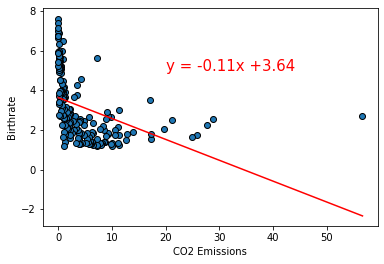

In [44]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
#plt.savefig(os.path.join("Images","2004_co2_v_birthrate.png"))

#show plot
plt.show()

In [45]:
#create 2014 dataframe, co2 descending order
df_2014 = co2_br_df[["Country", "2014 CO2 Emissions", "Birthrate_2014"]].sort_values("2014 CO2 Emissions", ascending=False).reset_index()
df_2014 = df_2014[["Country", "2014 CO2 Emissions", "Birthrate_2014"]]
df_2014

,Country,2014 CO2 Emissions,Birthrate_2014
0,Qatar,45.4000,1.95
1,Trinidad and Tobago,34.2000,1.78
2,Kuwait,25.2000,2.01
3,Bahrain,23.4000,2.07
4,United Arab Emirates,23.3000,1.78
...,...,...,...
179,Central African Republic,0.0666,5.01
180,"Congo, Dem. Rep.",0.0634,6.24
181,Chad,0.0538,6.16
182,Somalia,0.0450,6.46


In [46]:
#drop rows with nan values
df_2014 = df_2014.dropna()
df_2014

,Country,2014 CO2 Emissions,Birthrate_2014
0,Qatar,45.4000,1.95
1,Trinidad and Tobago,34.2000,1.78
2,Kuwait,25.2000,2.01
3,Bahrain,23.4000,2.07
4,United Arab Emirates,23.3000,1.78
...,...,...,...
179,Central African Republic,0.0666,5.01
180,"Congo, Dem. Rep.",0.0634,6.24
181,Chad,0.0538,6.16
182,Somalia,0.0450,6.46


Text(0, 0.5, 'Birthrate (% ??)')

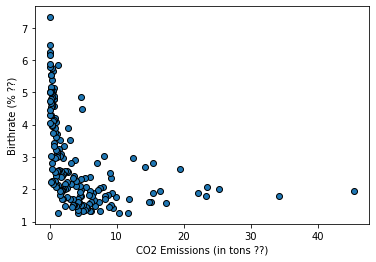

In [47]:
#run linear regression on co2 v birthrate (year 2014)

#first create scatter plot
x_values = df_2014["2014 CO2 Emissions"]
y_values = df_2014["Birthrate_2014"]
plt.scatter(x_values, y_values, edgecolors="black")
plt.xlabel("CO2 Emissions (in tons ??)")
plt.ylabel("Birthrate (% ??)")

In [48]:
#perform a linear regression on co2 v birthrate (year 2014)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -1.104231
1     -0.017272
2      0.856176
3      1.030866
4      1.040571
         ...   
179    3.295369
180    3.295680
181    3.296612
182    3.297466
183    3.297514
Name: 2014 CO2 Emissions, Length: 184, dtype: float64


In [49]:
#create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.1x +3.3


The r-squared is: -0.4263862548440094


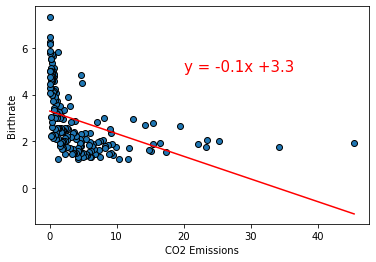

In [50]:
#create plot
plt.scatter(x_values,y_values,edgecolors="black")
plt.plot(x_values,regress_values,"r-")

#label plot and annotate the line equation
plt.xlabel('CO2 Emissions')
plt.ylabel('Birthrate')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

#save plot to images folder
#plt.savefig(os.path.join("Images","2014_co2_v_birthrate.png"))

#show plot
plt.show()

In [51]:
df_1974.describe()

,1974 CO2 Emissions,Birthrate_1974
count,169.000000,169.000000
mean,5.046675,5.073846
std,9.941039,1.958515
min,0.009740,1.620000
25%,0.349000,3.260000
50%,1.330000,5.580000
75%,6.530000,6.730000
max,68.200000,8.340000


In [52]:
#try binning on the 1974 df
#group by co2 emissions <=22.73, (22.73, 45.46], > 45.46

#create bins to place the carbon emissions
bins = [0, 22.72, 45.46, 69]

#create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [53]:
 # Slice the data and place it into bins
pd.cut(df_1974["1974 CO2 Emissions"], bins, labels=group_labels).head()

0    High-Level CO2
1    High-Level CO2
2    High-Level CO2
3     Mid-Level CO2
4     Mid-Level CO2
Name: 1974 CO2 Emissions, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [54]:
#place the data series into a new column inside of the DataFrame
df_1974["CO2 Group"] = pd.cut(df_1974["1974 CO2 Emissions"], bins, labels=group_labels)
df_1974

,Country,1974 CO2 Emissions,Birthrate_1974,CO2 Group
0,Qatar,68.20000,6.58,High-Level CO2
1,United Arab Emirates,66.50000,6.25,High-Level CO2
2,Brunei,52.80000,5.56,High-Level CO2
3,Luxembourg,41.00000,1.63,Mid-Level CO2
4,Bahamas,39.90000,3.33,Mid-Level CO2
...,...,...,...,...
164,Maldives,0.02770,7.04,Low-Level CO2
165,Burundi,0.02530,7.35,Low-Level CO2
166,Rwanda,0.01740,8.34,Low-Level CO2
167,Bhutan,0.01080,6.69,Low-Level CO2


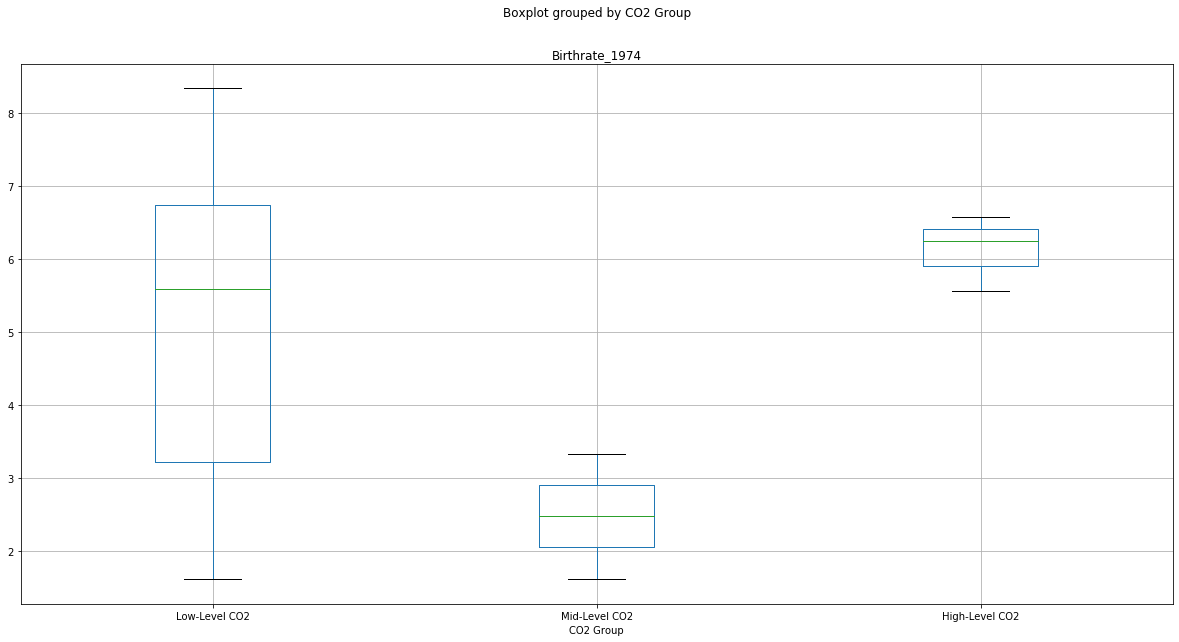

In [55]:
#try running ANOVA on the above dataframe

#create a boxplot to compare means
df_1974.boxplot("Birthrate_1974", by="CO2 Group", figsize=(20, 10))

In [56]:
#extract individual groups
group1 = df_1974[df_1974["CO2 Group"] == "Low-Level CO2"]["Birthrate_1974"]
group2 = df_1974[df_1974["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1974"]
group3 = df_1974[df_1974["CO2 Group"] == "High-Level CO2"]["Birthrate_1974"]

In [57]:
#perform the anova
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.22546756681091, pvalue=0.11123003802745039)

In [58]:
#we fail to reject the null hypothesis (that the 'populations' have the same mean)

In [59]:
#independent t-test
#null hypothesis is that two populations have identical means
#calculate the 'population' mean for birthrate in lowest co2 group (year 1974)
population1 = df_1974[df_1974["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1974.mean()

5.086158536585367

In [60]:
# Calculate the 'population' mean for birthrate in mid co2 group (year 1974)
population2 = df_1974[df_1974["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1974.mean()

2.48

In [61]:
# Calculate the 'population' mean for birthrate in highest co2 group (year 1974)
population3 = df_1974[df_1974["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1974.mean()

6.13

In [62]:
#calculate independent (two sample) t-test, low v mid (1974)
#null hypothesis is that the low co2 and mid co2 populations have the same mean
stats.ttest_ind(population1.Birthrate_1974, population2.Birthrate_1974, equal_var=False)

Ttest_indResult(statistic=3.017586886880267, pvalue=0.19116443352329557)

In [63]:
#we fail to reject the null hypothesis
#~we can't prove that the means for low co2 and mid co2 (year 1974) are not equal

In [64]:
#calculate independent (two sample) t-test, low v high (1974)
stats.ttest_ind(population1.Birthrate_1974, population3.Birthrate_1974, equal_var=False)

Ttest_indResult(statistic=-3.0956327560549117, pvalue=0.04972510869748724)

In [65]:
#calculate independent (two sample) t-test, mid v high (1974)
stats.ttest_ind(population2.Birthrate_1974, population3.Birthrate_1974, equal_var=False)

Ttest_indResult(statistic=-4.0485640742110185, pvalue=0.11417299856100048)

In [66]:
df_1984.describe()

,1984 CO2 Emissions,Birthrate_1984
count,169.000000,169.000000
mean,4.299628,4.495503
std,6.103107,2.015096
min,0.041100,1.400000
25%,0.419000,2.550000
50%,1.430000,4.550000
75%,6.760000,6.360000
max,36.100000,8.860000


In [67]:
#try binning on the 1984 df
#group by co2 emissions <=12.06, (12.06, 24.08], > 24.08

#create bins to place the carbon emissions
bins = [0, 12.06, 24.08, 36.2]

#create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [68]:
 # Slice the data and place it into bins
pd.cut(df_1984["1984 CO2 Emissions"], bins, labels=group_labels).head()

0    High-Level CO2
1    High-Level CO2
2    High-Level CO2
3     Mid-Level CO2
4     Mid-Level CO2
Name: 1984 CO2 Emissions, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [69]:
#place the data series into a new column inside of the DataFrame
df_1984["CO2 Group"] = pd.cut(df_1984["1984 CO2 Emissions"], bins, labels=group_labels)
df_1984

,Country,1984 CO2 Emissions,Birthrate_1984,CO2 Group
0,Qatar,36.1000,5.13,High-Level CO2
1,United Arab Emirates,35.2000,5.22,High-Level CO2
2,Luxembourg,24.4000,1.45,High-Level CO2
3,Bahrain,22.6000,4.47,Mid-Level CO2
4,United States,18.8000,1.79,Mid-Level CO2
...,...,...,...,...
164,Burundi,0.0481,7.46,Low-Level CO2
165,Chad,0.0437,7.09,Low-Level CO2
166,Nepal,0.0431,5.55,Low-Level CO2
167,Ethiopia,0.0421,7.44,Low-Level CO2


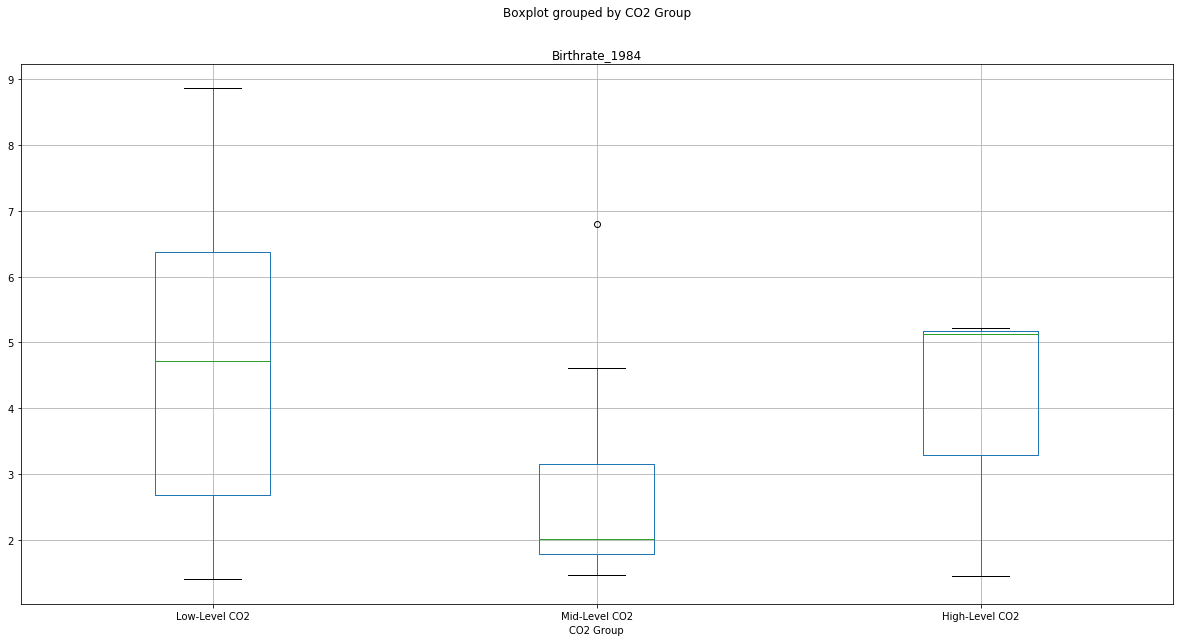

In [70]:
#try running ANOVA on the above dataframe

#create a boxplot to compare means
df_1984.boxplot("Birthrate_1984", by="CO2 Group", figsize=(20, 10))

In [71]:
#extract individual groups
group1 = df_1984[df_1984["CO2 Group"] == "Low-Level CO2"]["Birthrate_1984"]
group2 = df_1984[df_1984["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1984"]
group3 = df_1984[df_1984["CO2 Group"] == "High-Level CO2"]["Birthrate_1984"]

In [72]:
#perform the anova
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=5.4197155924514, pvalue=0.0052469295784811605)

In [73]:
#we reject the null hypothesis (that the 'populations' have the same mean)

In [74]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 1984)
population1 = df_1984[df_1984["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1984.mean()

4.650261437908497

In [75]:
#calculate the 'population' mean for birthrate in mid co2 group (year 1984)
population2 = df_1984[df_1984["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1984.mean()

2.803846153846154

In [76]:
#calculate the 'population' mean for birthrate in highest co2 group (year 1984)
population3 = df_1984[df_1984["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1984.mean()

3.933333333333333

In [77]:
#calculate independent (two sample) t-test, low v mid (1984)
stats.ttest_ind(population1.Birthrate_1984, population2.Birthrate_1984, equal_var=False)

Ttest_indResult(statistic=3.916311221072401, pvalue=0.001322492667227697)

In [78]:
#calculate independent (two sample) t-test, low v high (1984)
stats.ttest_ind(population1.Birthrate_1984, population3.Birthrate_1984, equal_var=False)

Ttest_indResult(statistic=0.5724935509811278, pvalue=0.6231034774169064)

In [79]:
#calculate independent (two sample) t-test, mid v high (1984)
stats.ttest_ind(population2.Birthrate_1984, population3.Birthrate_1984, equal_var=False)

Ttest_indResult(statistic=-0.8565393730267056, pvalue=0.4649917518020482)

In [124]:
df_1994

,Country,1994 CO2 Emissions,Birthrate_1994,CO2 Group
0,Qatar,59.6000,3.65,High-Level CO2
1,United Arab Emirates,31.4000,3.62,Mid-Level CO2
2,Bahrain,26.9000,3.21,Mid-Level CO2
3,Luxembourg,25.3000,1.69,Mid-Level CO2
4,Kuwait,23.4000,2.66,Mid-Level CO2
...,...,...,...,...
177,Ethiopia,0.0404,7.05,Low-Level CO2
178,Burundi,0.0400,7.34,Low-Level CO2
179,Haiti,0.0392,5.00,Low-Level CO2
180,Uganda,0.0355,7.04,Low-Level CO2


In [80]:
df_1994.describe()

,1994 CO2 Emissions,Birthrate_1994
count,182.000000,182.000000
mean,4.352616,3.728022
std,6.801720,1.837173
min,0.015200,1.230000
25%,0.385500,2.000000
50%,1.615000,3.340000
75%,6.077500,5.192500
max,59.600000,7.800000


In [125]:
#try binning on the 1994 df
#group by co2 emissions <=19.87, (19.87, 39.74], > 39.74

#create bins to place the carbon emissions
#bins = [0, 19.87, 39.74, 59.7]
bins = [0, 10.47, 20.94, 31.5]

#create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [126]:
 # Slice the data and place it into bins
pd.cut(df_1994["1994 CO2 Emissions"], bins, labels=group_labels).head()

0               NaN
1    High-Level CO2
2    High-Level CO2
3    High-Level CO2
4    High-Level CO2
Name: 1994 CO2 Emissions, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [127]:
#place the data series into a new column inside of the DataFrame
df_1994["CO2 Group"] = pd.cut(df_1994["1994 CO2 Emissions"], bins, labels=group_labels)
df_1994

,Country,1994 CO2 Emissions,Birthrate_1994,CO2 Group
0,Qatar,59.6000,3.65,NaN
1,United Arab Emirates,31.4000,3.62,High-Level CO2
2,Bahrain,26.9000,3.21,High-Level CO2
3,Luxembourg,25.3000,1.69,High-Level CO2
4,Kuwait,23.4000,2.66,High-Level CO2
...,...,...,...,...
177,Ethiopia,0.0404,7.05,Low-Level CO2
178,Burundi,0.0400,7.34,Low-Level CO2
179,Haiti,0.0392,5.00,Low-Level CO2
180,Uganda,0.0355,7.04,Low-Level CO2


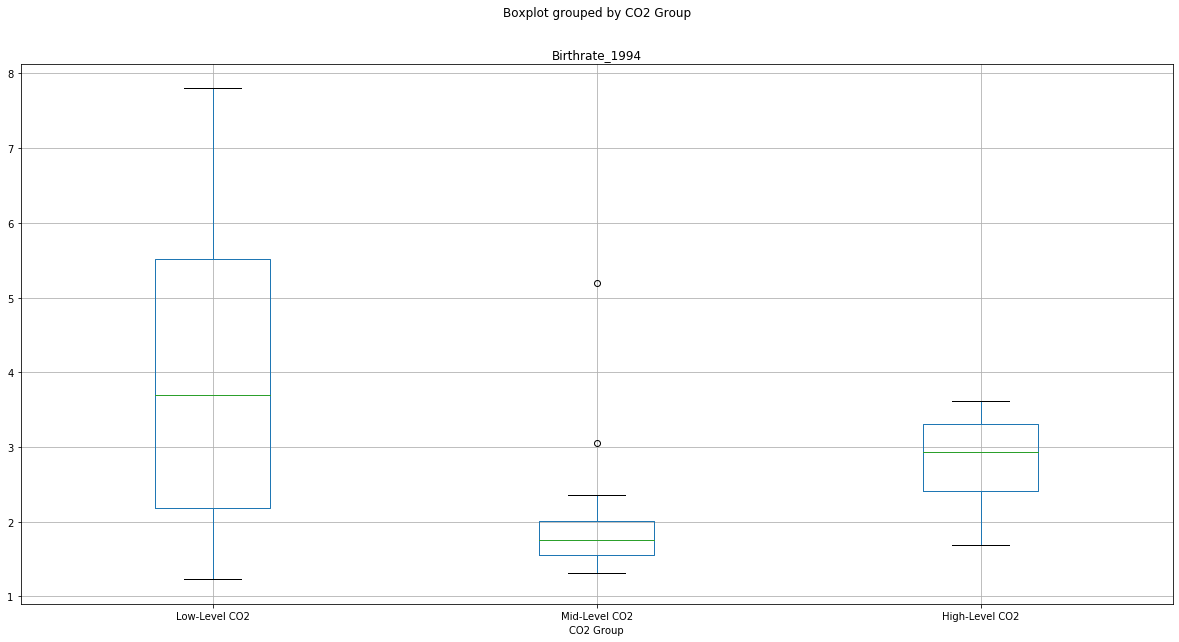

In [128]:
#try running ANOVA on the above dataframe

#create a boxplot to compare means
df_1994.boxplot("Birthrate_1994", by="CO2 Group", figsize=(20, 10))

In [129]:
#extract individual groups
group1 = df_1994[df_1994["CO2 Group"] == "Low-Level CO2"]["Birthrate_1994"]
group2 = df_1994[df_1994["CO2 Group"] == "Mid-Level CO2"]["Birthrate_1994"]
group3 = df_1994[df_1994["CO2 Group"] == "High-Level CO2"]["Birthrate_1994"]

In [130]:
#perform the anova
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=8.95348947937137, pvalue=0.0001972143158635787)

In [87]:
#we fail to reject the null hypothesis (that the 'populations' have the same mean)

In [131]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 1994)
population1 = df_1994[df_1994["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_1994.mean()

3.9208695652173913

In [132]:
#calculate the 'population' mean for birthrate in mid co2 group (year 1994)
population2 = df_1994[df_1994["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_1994.mean()

2.0256250000000002

In [133]:
#calculate the 'population' mean for birthrate in highest co2 group (year 1994)
population3 = df_1994[df_1994["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_1994.mean()

2.795

In [134]:
#calculate independent (two sample) t-test, low v mid (1994)
stats.ttest_ind(population1.Birthrate_1994, population2.Birthrate_1994, equal_var=False)

Ttest_indResult(statistic=6.83028356992508, pvalue=2.0456190226109258e-07)

In [135]:
#WHAT'S WRONG
#calculate independent (two sample) t-test, low v high (1994)
stats.ttest_ind(population1.Birthrate_1994, population3.Birthrate_1994, equal_var=False)

Ttest_indResult(statistic=2.547725857100322, pvalue=0.06731869902518281)

In [136]:
#WHAT'S WRONG
#calculate independent (two sample) t-test, mid v high (1994)
stats.ttest_ind(population2.Birthrate_1994, population3.Birthrate_1994, equal_var=False)

Ttest_indResult(statistic=-1.6028965605632597, pvalue=0.16835126798273775)

In [137]:
df_2004

,Country,2004 CO2 Emissions,Birthrate_2004,CO2 Group
0,Qatar,56.6000,2.71,High-Level CO2
1,Kuwait,28.8000,2.55,Mid-Level CO2
2,United Arab Emirates,27.7000,2.24,Mid-Level CO2
3,Trinidad and Tobago,25.9000,1.76,Mid-Level CO2
4,Luxembourg,24.9000,1.65,Mid-Level CO2
...,...,...,...,...
178,Central African Republic,0.0579,5.41,Low-Level CO2
179,Afghanistan,0.0394,6.99,Low-Level CO2
180,Chad,0.0389,7.15,Low-Level CO2
181,Burundi,0.0276,6.76,Low-Level CO2


In [94]:
df_2004.describe()

,2004 CO2 Emissions,Birthrate_2004
count,183.000000,183.000000
mean,4.591369,3.154590
std,6.667324,1.683938
min,0.022600,1.180000
25%,0.495500,1.810000
50%,2.130000,2.610000
75%,6.390000,4.225000
max,56.600000,7.630000


In [138]:
#try binning on the 2004 df
#group by co2 emissions <=18.87, (18.87, 37.74], > 37.74

#create bins to place the carbon emissions
#bins = [0, 18.87, 37.74, 56.7]
bins = [0, 9.43, 18.87, 28.9]

#create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [139]:
 # Slice the data and place it into bins
pd.cut(df_2004["2004 CO2 Emissions"], bins, labels=group_labels).head()

0               NaN
1    High-Level CO2
2    High-Level CO2
3    High-Level CO2
4    High-Level CO2
Name: 2004 CO2 Emissions, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [140]:
#place the data series into a new column inside of the DataFrame
df_2004["CO2 Group"] = pd.cut(df_2004["2004 CO2 Emissions"], bins, labels=group_labels)
df_2004

,Country,2004 CO2 Emissions,Birthrate_2004,CO2 Group
0,Qatar,56.6000,2.71,NaN
1,Kuwait,28.8000,2.55,High-Level CO2
2,United Arab Emirates,27.7000,2.24,High-Level CO2
3,Trinidad and Tobago,25.9000,1.76,High-Level CO2
4,Luxembourg,24.9000,1.65,High-Level CO2
...,...,...,...,...
178,Central African Republic,0.0579,5.41,Low-Level CO2
179,Afghanistan,0.0394,6.99,Low-Level CO2
180,Chad,0.0389,7.15,Low-Level CO2
181,Burundi,0.0276,6.76,Low-Level CO2


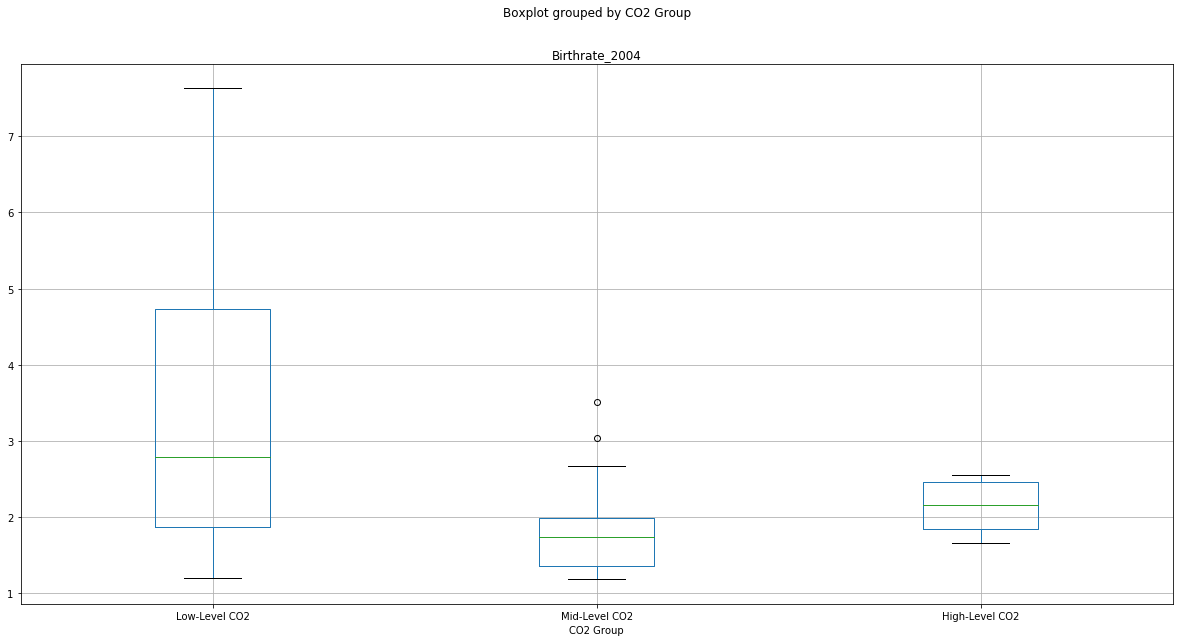

In [141]:
#try running ANOVA on the above dataframe

#create a boxplot to compare means
df_2004.boxplot("Birthrate_2004", by="CO2 Group", figsize=(20, 10))

In [142]:
#extract individual groups
group1 = df_2004[df_2004["CO2 Group"] == "Low-Level CO2"]["Birthrate_2004"]
group2 = df_2004[df_2004["CO2 Group"] == "Mid-Level CO2"]["Birthrate_2004"]
group3 = df_2004[df_2004["CO2 Group"] == "High-Level CO2"]["Birthrate_2004"]

In [143]:
#perform the anova
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=7.414528152724707, pvalue=0.0008060396295975093)

In [101]:
#we fail to reject the null hypothesis (that the 'populations' have the same mean)

In [144]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 2004)
population1 = df_2004[df_2004["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_2004.mean()

3.333459119496856

In [145]:
#calculate the 'population' mean for birthrate in mid co2 group (year 2004)
population2 = df_2004[df_2004["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_2004.mean()

1.868823529411765

In [146]:
#calculate the 'population' mean for birthrate in highest co2 group (year 2004)
population3 = df_2004[df_2004["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_2004.mean()

2.1316666666666664

In [147]:
#calculate independent (two sample) t-test, low v mid (2004)
stats.ttest_ind(population1.Birthrate_2004, population2.Birthrate_2004, equal_var=False)

Ttest_indResult(statistic=7.0063229791353425, pvalue=8.766856976516902e-09)

In [148]:
#WRONG
#calculate independent (two sample) t-test, low v high (2004)
stats.ttest_ind(population1.Birthrate_2004, population3.Birthrate_2004, equal_var=False)

Ttest_indResult(statistic=5.816745660317116, pvalue=2.9850813435716226e-05)

In [149]:
#WRONG
#calculate independent (two sample) t-test, mid v high (2004)
stats.ttest_ind(population2.Birthrate_2004, population3.Birthrate_2004, equal_var=False)

Ttest_indResult(statistic=-1.1867023091700577, pvalue=0.25313922444906123)

In [108]:
df_2014.describe()

,2014 CO2 Emissions,Birthrate_2014
count,184.000000,184.000000
mean,4.455197,2.869457
std,6.152708,1.400419
min,0.044500,1.250000
25%,0.624500,1.787500
50%,2.265000,2.360000
75%,5.705000,3.902500
max,45.400000,7.340000


In [109]:
#try binning on the 2014 df
#group by co2 emissions <=15.13, (15.13, 30.26], > 30.26

#create bins to place the carbon emissions
bins = [0, 15.13, 30.26, 45.5]

#create labels for the bins
group_labels = ["Low-Level CO2", "Mid-Level CO2", "High-Level CO2"]

In [110]:
 # Slice the data and place it into bins
pd.cut(df_2014["2014 CO2 Emissions"], bins, labels=group_labels).head()

0    High-Level CO2
1    High-Level CO2
2     Mid-Level CO2
3     Mid-Level CO2
4     Mid-Level CO2
Name: 2014 CO2 Emissions, dtype: category
Categories (3, object): [Low-Level CO2 < Mid-Level CO2 < High-Level CO2]

In [111]:
#place the data series into a new column inside of the DataFrame
df_2014["CO2 Group"] = pd.cut(df_2014["2014 CO2 Emissions"], bins, labels=group_labels)
df_2014

,Country,2014 CO2 Emissions,Birthrate_2014,CO2 Group
0,Qatar,45.4000,1.95,High-Level CO2
1,Trinidad and Tobago,34.2000,1.78,High-Level CO2
2,Kuwait,25.2000,2.01,Mid-Level CO2
3,Bahrain,23.4000,2.07,Mid-Level CO2
4,United Arab Emirates,23.3000,1.78,Mid-Level CO2
...,...,...,...,...
179,Central African Republic,0.0666,5.01,Low-Level CO2
180,"Congo, Dem. Rep.",0.0634,6.24,Low-Level CO2
181,Chad,0.0538,6.16,Low-Level CO2
182,Somalia,0.0450,6.46,Low-Level CO2


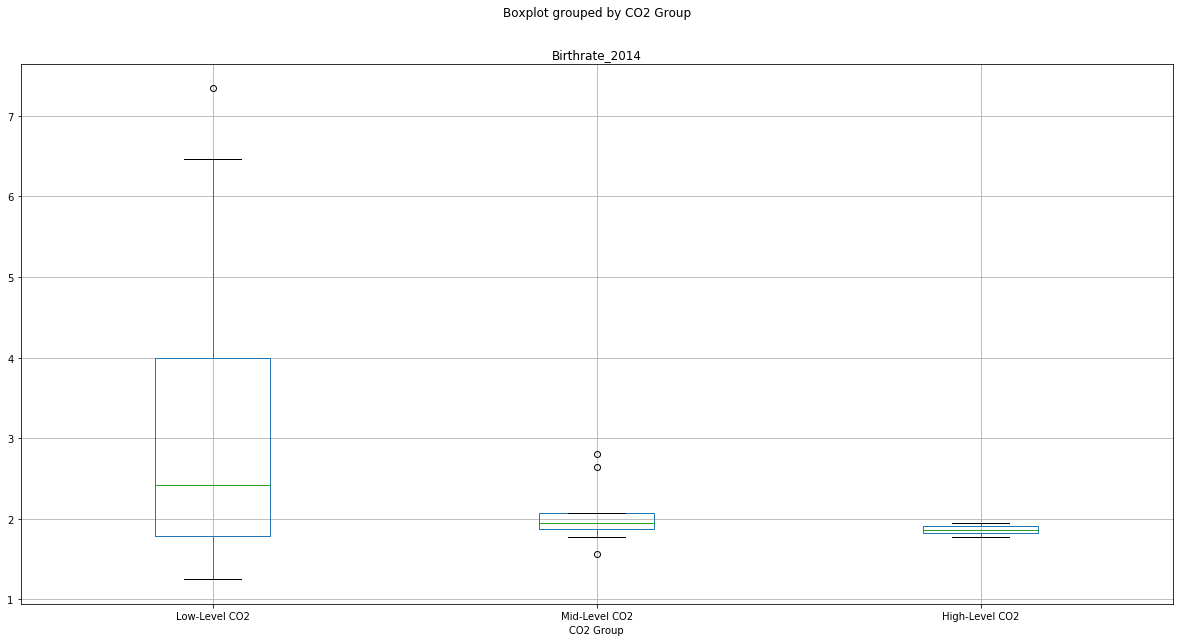

In [112]:
#try running ANOVA on the above dataframe

#create a boxplot to compare means
df_2014.boxplot("Birthrate_2014", by="CO2 Group", figsize=(20, 10))

In [113]:
#extract individual groups
group1 = df_2014[df_2014["CO2 Group"] == "Low-Level CO2"]["Birthrate_2014"]
group2 = df_2014[df_2014["CO2 Group"] == "Mid-Level CO2"]["Birthrate_2014"]
group3 = df_2014[df_2014["CO2 Group"] == "High-Level CO2"]["Birthrate_2014"]

In [114]:
#perform the anova
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.1590094168910055, pvalue=0.11840330378773414)

In [115]:
#we fail to reject the null hypothesis (that the 'populations' have the same mean)

In [116]:
#independent t-test
#calculate the 'population' mean for birthrate in lowest co2 group (year 2014)
population1 = df_2014[df_2014["CO2 Group"] == "Low-Level CO2"]
population1.Birthrate_2014.mean()

2.9230057803468217

In [117]:
#calculate the 'population' mean for birthrate in mid co2 group (year 2014)
population2 = df_2014[df_2014["CO2 Group"] == "Mid-Level CO2"]
population2.Birthrate_2014.mean()

2.0633333333333335

In [118]:
#calculate the 'population' mean for birthrate in mid co2 group (year 2014)
population3 = df_2014[df_2014["CO2 Group"] == "High-Level CO2"]
population3.Birthrate_2014.mean()

1.865

In [119]:
#calculate independent (two sample) t-test, low v mid (2014)
stats.ttest_ind(population1.Birthrate_2014, population2.Birthrate_2014, equal_var=False)

Ttest_indResult(statistic=4.989941926331347, pvalue=5.780655003320307e-05)

In [120]:
#calculate independent (two sample) t-test, low v high (2014)
stats.ttest_ind(population1.Birthrate_2014, population3.Birthrate_2014, equal_var=False)

Ttest_indResult(statistic=7.683406230953071, pvalue=0.0001383794422842055)

In [121]:
#calculate independent (two sample) t-test, mid v high (2014)
stats.ttest_ind(population2.Birthrate_2014, population3.Birthrate_2014, equal_var=False)

Ttest_indResult(statistic=1.2501407050264302, pvalue=0.25224938444185263)

In [122]:
# Vallie's code stops here
